In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [2]:
wd = pdr.get_data_yahoo('WD','2019-05-31')
wd = wd.drop('Adj Close', axis=1)
wd = round(wd,2)
wd.head()

,High,Low,Open,Close,Volume
Date,,,,,
2019-05-30,52.30,50.44,52.09,50.53,132100.0
2019-05-31,50.77,49.49,50.03,50.27,225700.0
2019-06-03,50.57,49.51,50.15,50.23,112000.0
2019-06-04,51.59,50.68,50.71,51.59,99000.0
2019-06-05,52.05,51.17,51.77,51.90,149800.0


In [3]:
wd['9-day'] = wd['Close'].rolling(9).mean()
wd['21-day'] = wd['Close'].rolling(21).mean()
wd['30-day'] = wd['Close'].rolling(30).mean()
wd['60-day'] = wd['Close'].rolling(60).mean()
wd['Change'] = np.log(wd.Close / wd.Close.shift())
wd.tail()

,High,Low,Open,Close,Volume,9-day,21-day,30-day,60-day,Change
Date,,,,,,,,,,
2021-05-26,101.06,98.00,98.00,100.23,133800.0,99.477778,103.369048,105.007333,104.749833,0.028231
2021-05-27,102.13,100.49,101.38,101.14,139700.0,99.426667,102.915238,104.753667,104.763000,0.009038
2021-05-28,102.19,100.00,101.40,101.54,84800.0,99.555556,102.383333,104.439333,104.793667,0.003947
2021-06-01,103.05,100.01,102.14,101.80,134600.0,99.877778,101.952381,104.165000,104.813167,0.002557
2021-06-02,102.69,99.34,102.69,99.72,113460.0,99.994444,101.319048,103.937000,104.817667,-0.020644


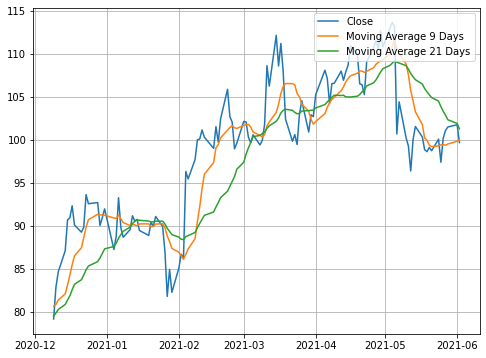

In [4]:
# Look at the last 120 days
plt.figure(figsize=(8,6))
plt.grid(True)
plt.plot(wd['Close'][-120:],label='Close')
plt.plot(wd['9-day'][-120:],label='Moving Average 9 Days')
plt.plot(wd['21-day'][-120:],label='Moving Average 21 Days')
plt.legend(loc=1)

In [5]:
# When the faster moving average is moving above the slower one, indicates time to buy
wd['position'] = np.where(wd['9-day'] > wd['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
wd['position'] = np.where(wd['9-day'] < wd['21-day'],-1,wd['position'])

In [6]:
wd.tail(100)

,High,Low,Open,Close,Volume,9-day,21-day,30-day,60-day,Change,position
Date,,,,,,,,,,,
2021-01-08,90.44,86.38,90.00,88.72,237000.0,90.428889,89.409048,86.891333,77.744000,-0.012211,1
2021-01-11,90.66,87.39,87.59,89.61,141600.0,90.080000,89.903810,87.143000,78.254833,0.009982,1
2021-01-12,91.64,89.45,90.27,91.22,113300.0,90.205556,90.299048,87.481333,78.782667,0.017807,-1
2021-01-13,91.94,89.54,91.82,90.60,139800.0,90.161111,90.580000,87.834333,79.303833,-0.006820,-1
2021-01-14,91.97,90.02,91.33,90.80,120500.0,90.025556,90.753810,88.167000,79.831667,0.002205,-1
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26,101.06,98.00,98.00,100.23,133800.0,99.477778,103.369048,105.007333,104.749833,0.028231,-1
2021-05-27,102.13,100.49,101.38,101.14,139700.0,99.426667,102.915238,104.753667,104.763000,0.009038,-1
2021-05-28,102.19,100.00,101.40,101.54,84800.0,99.555556,102.383333,104.439333,104.793667,0.003947,-1


<AxesSubplot:xlabel='Date'>

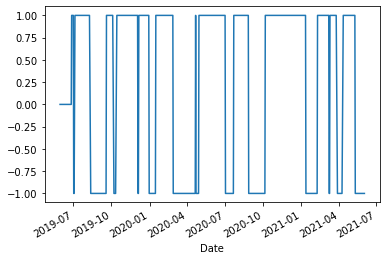

In [7]:
wd['position'].plot()

In [8]:
# Whether we are making money with this system
wd['system'] = wd['position'] * wd['Change']

<AxesSubplot:xlabel='Date'>

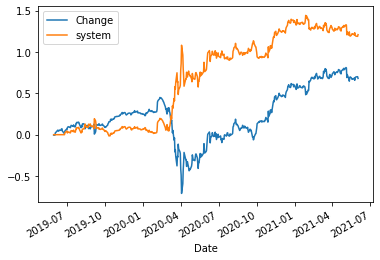

In [9]:
wd[['Change','system']].cumsum().plot()